## Описание данных и постановка задачи:
**Задача:** Банкам, выпускающим кредитные карты, очень важно распознавать мошеннические операции с кредитными картами, чтобы с клиентов не взималась плата за товары, которые они не покупали.

**Данные**: Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, проведенные за два дня, где мы имеем 492 случаев мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, положительный класс (мошенники) составляет всего 0,172% от всех транзакций.

Датасет содержит только числовые входные переменные, которые являются результатом преобразования PCA (метод главных компонент).

Из-за вопросов конфиденциальности невозможно использовать исходные признаки и более подробную информацию о них. Характеристики V1, V2, ... V28 - это главные компоненты, полученные с помощью PCA, единственные характеристики, которые не были преобразованы с помощью PCA - это "Time" и "Amount". Столбец "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Столбец "Amount" - это сумма транзакции. Столбец "Class" является переменной отклика и принимает значение 1 в случае мошенничества и 0 в противном случае.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Начальный осмотр данных
print("Информация о датасете:")
print(df.info())
print("\n" + "="*50)

print("Статистическое описание данных:")
print(df.describe())
print("\n" + "="*50)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

In [ ]:
# Проверим на наличие пропусков в данных
print("Проверка на пропущенные значения:")
print(df.isnull().sum())
print("\n" + "="*50)

print("Названия столбцов:")
print(df.columns.tolist())
print("\n" + "="*50)


Проверка на пропущенные значения:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Названия столбцов:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']



In [ ]:
# Оценим отношение классов целевой переменной
class_counts = df['Class'].value_counts()
total = len(df)

# Вычисляем процентное соотношение
n_trans = round((class_counts[0] / total) * 100, 2)
f_trans = round((class_counts[1] / total) * 100, 2)

print(f'Обычные транзакции составляют {n_trans} % данных')
print(f'Мошеннические транзакции составляют {f_trans} % данных')
print(f'\nАбсолютные значения:')
print(f'Не мошеннические: {class_counts[0]} транзакций')
print(f'Мошеннические: {class_counts[1]} транзакций')
print("\n" + "="*50)

Обычные транзакции составляют 99.83 % данных
Мошеннические транзакции составляют 0.17 % данных

Абсолютные значения:
Не мошеннические: 284315 транзакций
Мошеннические: 492 транзакций



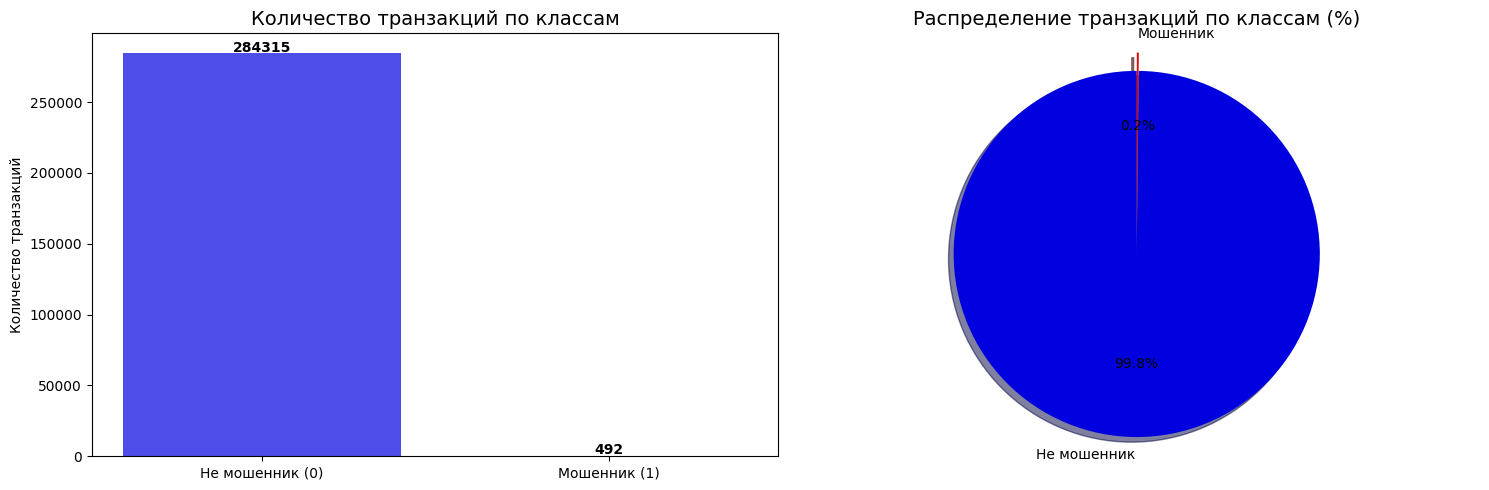

In [ ]:
# Визуализация распределения классов
colors = ["#0101DF", "#DF0101"]

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].bar(['Не мошенник (0)', 'Мошенник (1)'],
           [class_counts[0], class_counts[1]],
           color=colors, alpha=0.7)
axes[0].set_title('Количество транзакций по классам', fontsize=14)
axes[0].set_ylabel('Количество транзакций')

# Добавляем значения на столбцы
for i, v in enumerate([class_counts[0], class_counts[1]]):
    axes[0].text(i, v + 1000, str(v), ha='center', fontweight='bold')

# Круговая диаграмма
labels = ['Не мошенник', 'Мошенник']
sizes = [class_counts[0], class_counts[1]]
explode = (0, 0.1)  # Выделяем сегмент мошенников

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')
axes[1].set_title('Распределение транзакций по классам (%)', fontsize=14)

plt.tight_layout()
plt.show()



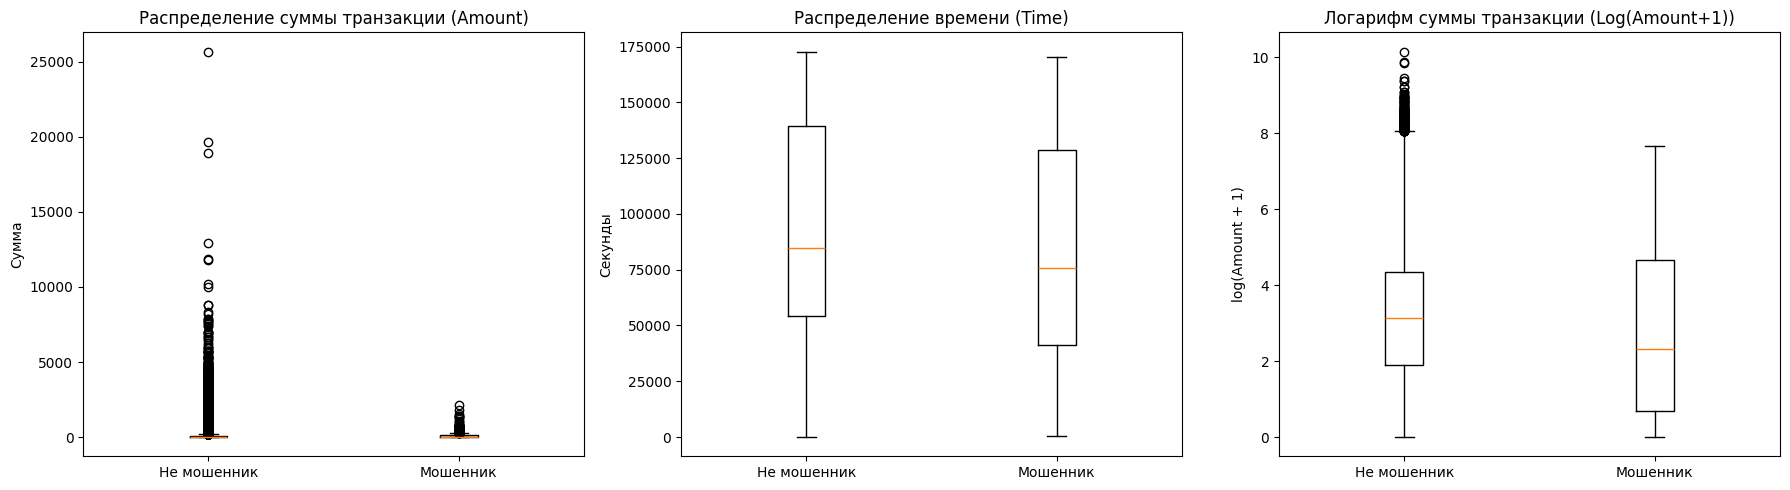

In [ ]:
# Анализ признаков Time и Amount
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot([df[df['Class'] == 0]['Amount'],
                df[df['Class'] == 1]['Amount']],
               labels=['Не мошенник', 'Мошенник'])
axes[0].set_title('Распределение суммы транзакции (Amount)')
axes[0].set_ylabel('Сумма')

axes[1].boxplot([df[df['Class'] == 0]['Time'],
                df[df['Class'] == 1]['Time']],
               labels=['Не мошенник', 'Мошенник'])
axes[1].set_title('Распределение времени (Time)')
axes[1].set_ylabel('Секунды')

# Логарифмическое преобразование Amount для лучшей визуализации
df['Log_Amount'] = np.log1p(df['Amount'])  # log(1 + x) для избежания log(0)

axes[2].boxplot([df[df['Class'] == 0]['Log_Amount'],
                df[df['Class'] == 1]['Log_Amount']],
               labels=['Не мошенник', 'Мошенник'])
axes[2].set_title('Логарифм суммы транзакции (Log(Amount+1))')
axes[2].set_ylabel('log(Amount + 1)')

plt.tight_layout()
plt.show()

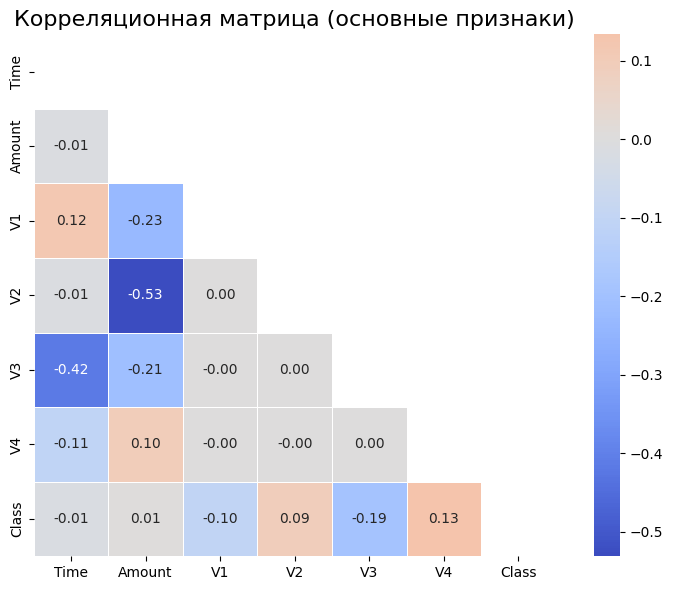

In [ ]:
# Корреляционный анализ
plt.figure(figsize=(8, 6))
correlation_columns = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'Class']
corr_matrix = df[correlation_columns].corr()

# Маска для верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title('Корреляционная матрица (основные признаки)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Разделение данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Создаем RobustScaler (менее чувствителен к выбросам)
rob_scaler = RobustScaler()

# Разделяем признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']

# Разделяем на обучающую и тестовую выборки
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Проверяем типы данных
rt_tmp = original_Xtrain['Amount']
print(f'Тип данных original_Xtrain["Amount"]: {type(rt_tmp)}')
print(f'Тип данных original_Xtrain["Amount"].values: {type(rt_tmp.values)}')
print(f'Данные original_Xtrain["Amount"].values:\n{rt_tmp.values[:5]}')
print(f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1): {type(rt_tmp.values.reshape(-1,1))}')
print(f'Данные original_Xtrain["Amount"].values.reshape(-1,1):\n{rt_tmp.values[:5].reshape(-1,1)}\n')

# Масштабируем Amount и Time
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1,1))

# Удаляем исходные столбцы Time и Amount
original_Xtrain.drop(['Time', 'Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time', 'Amount'], axis=1, inplace=True)

Тип данных original_Xtrain["Amount"]: <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values: <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values:
[  7.32   2.99 175.1    6.1   86.1 ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1): <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1):
[[  7.32]
 [  2.99]
 [175.1 ]
 [  6.1 ]
 [ 86.1 ]]



In [ ]:
# Преобразуем в numpy массивы для более быстрой обработки
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Анализируем распределение классов после разделения
# Исправленная часть кода с выводом распределения классов
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов после разделения:\n')
print(f"Обучающий набор (0/1): {train_counts_label[0]}/{train_counts_label[1]} - "
      f"{train_counts_label[0]/len(original_ytrain)*100:.2f}%/{train_counts_label[1]/len(original_ytrain)*100:.2f}%")
print(f"Тестовый набор (0/1): {test_counts_label[0]}/{test_counts_label[1]} - "
      f"{test_counts_label[0]/len(original_ytest)*100:.2f}%/{test_counts_label[1]/len(original_ytest)*100:.2f}%")
print("\n" + "="*50)

Распределение классов после разделения:

Обучающий набор (0/1): 227451/394 - 99.83%/0.17%
Тестовый набор (0/1): 56864/98 - 99.83%/0.17%



In [ ]:
# ===================================================================
# МЕТОД RANDOM UNDER-SAMPLING
# ===================================================================

print("\nПРИМЕНЕНИЕ RANDOM UNDER-SAMPLING")
print("="*50)

# Создаем копию исходного датасета для балансировки
df_balanced = df.copy()

# Перемешиваем данные перед созданием подвыборок
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделяем на мошеннические и немошеннические транзакции
fraud_df = df_balanced.loc[df_balanced['Class'] == 1]
non_fraud_df = df_balanced.loc[df_balanced['Class'] == 0]

print(f"Исходное количество мошеннических транзакций: {len(fraud_df)}")
print(f"Исходное количество немошеннических транзакций: {len(non_fraud_df)}")

# Берем случайные 492 немошеннические транзакции (столько же, сколько мошеннических)
non_fraud_sampled = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Объединяем датафреймы
normal_distributed_df = pd.concat([fraud_df, non_fraud_sampled])

# Перемешиваем строки датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nПосле балансировки:")
print(f"Мошеннические транзакции: {len(new_df[new_df['Class'] == 1])}")
print(f"Немошеннические транзакции: {len(new_df[new_df['Class'] == 0])}")
print(f"Общий размер датасета: {len(new_df)}")
print(f"Соотношение классов: 1:{len(new_df[new_df['Class'] == 0])/len(new_df[new_df['Class'] == 1]):.1f}")

# Показываем первые строки сбалансированного датасета
print("\nПервые 5 строк сбалансированного датасета:")
print(new_df.head())
print("\n" + "="*50)


ПРИМЕНЕНИЕ RANDOM UNDER-SAMPLING
Исходное количество мошеннических транзакций: 492
Исходное количество немошеннических транзакций: 284315

После балансировки:
Мошеннические транзакции: 492
Немошеннические транзакции: 492
Общий размер датасета: 984
Соотношение классов: 1:1.0

Первые 5 строк сбалансированного датасета:
       Time        V1        V2        V3        V4        V5        V6  \
0  169518.0 -0.300026  0.949818  0.074290  0.933936  0.996314 -0.734827   
1   65385.0 -2.923827  1.524837 -3.018758  3.289291 -5.755542  2.218276   
2   54608.0  0.786116 -1.067510  0.917200  0.885069 -0.987685  0.989969   
3   56098.0 -1.229669  1.956099 -0.851198  2.796987 -1.913977 -0.044934   
4  157284.0 -0.242245  4.147186 -5.672349  6.493741  1.591168 -1.602523   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  1.065931 -0.046607 -0.682219  ...  0.660828 -0.253749 -0.004951 -0.059794   
1 -0.509995 -3.569444 -1.016592  ... -0.122724 -4.288639  0.563797 -0

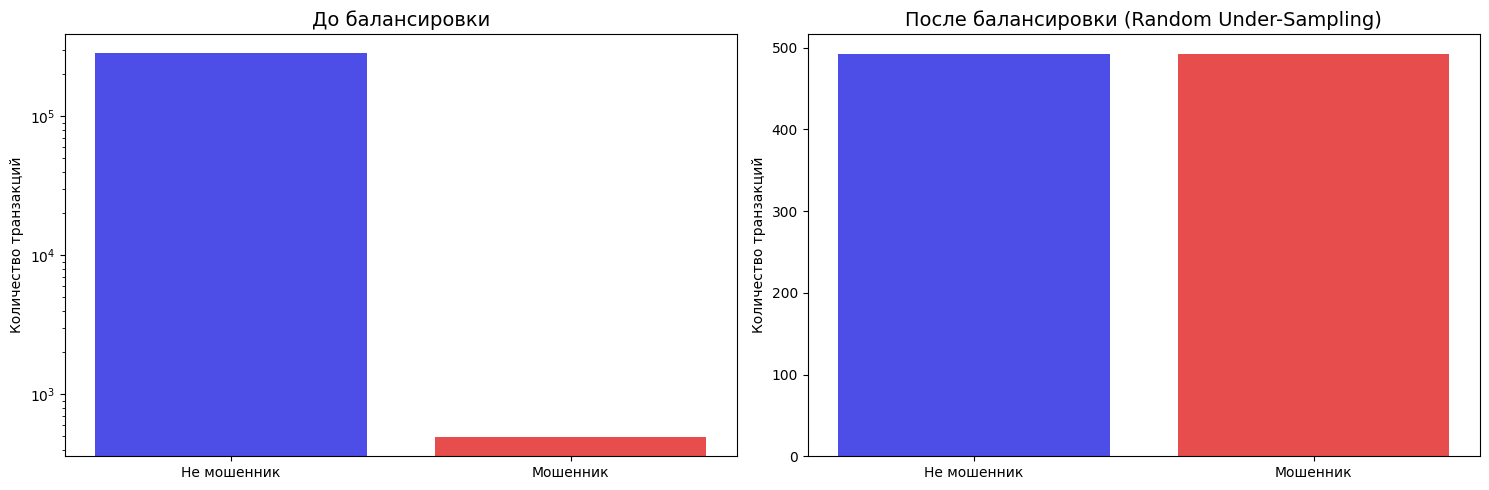

In [ ]:
# ===================================================================
# ВИЗУАЛИЗАЦИЯ СБАЛАНСИРОВАННОГО ДАТАСЕТА
# ===================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Сравнение распределения классов до и после балансировки
class_counts_before = df['Class'].value_counts()
class_counts_after = new_df['Class'].value_counts()

# До балансировки
axes[0].bar(['Не мошенник', 'Мошенник'],
           [class_counts_before[0], class_counts_before[1]],
           color=['#0101DF', '#DF0101'], alpha=0.7)
axes[0].set_title('До балансировки', fontsize=14)
axes[0].set_ylabel('Количество транзакций')
axes[0].set_yscale('log')  # Логарифмическая шкала из-за большого различия

# После балансировки
axes[1].bar(['Не мошенник', 'Мошенник'],
           [class_counts_after[0], class_counts_after[1]],
           color=['#0101DF', '#DF0101'], alpha=0.7)
axes[1].set_title('После балансировки (Random Under-Sampling)', fontsize=14)
axes[1].set_ylabel('Количество транзакций')

plt.tight_layout()
plt.show()


In [ ]:
# ===================================================================
# РАЗДЕЛЕНИЕ СБАЛАНСИРОВАННОГО ДАТАСЕТА И МАСШТАБИРОВАНИЕ
# ===================================================================

print("\nРАБОТА СО СБАЛАНСИРОВАННЫМ ДАТАСЕТОМ")
print("="*50)

# Разделяем сбалансированный датасет на признаки и целевую переменную
X_balanced = new_df.drop('Class', axis=1)
y_balanced = new_df['Class']

# Разделяем сбалансированный датасет на обучающую и тестовую выборки
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"Размеры сбалансированных выборок:")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"X_test_balanced: {X_test_balanced.shape}")
print(f"y_train_balanced: {y_train_balanced.shape}")
print(f"y_test_balanced: {y_test_balanced.shape}")

# Масштабируем столбцы Time и Amount для сбалансированного датасета
X_train_balanced['scaled_amount'] = rob_scaler.fit_transform(X_train_balanced['Amount'].values.reshape(-1,1))
X_test_balanced['scaled_amount'] = rob_scaler.transform(X_test_balanced['Amount'].values.reshape(-1,1))

X_train_balanced['scaled_time'] = rob_scaler.fit_transform(X_train_balanced['Time'].values.reshape(-1,1))
X_test_balanced['scaled_time'] = rob_scaler.transform(X_test_balanced['Time'].values.reshape(-1,1))

# Удаляем исходные столбцы
X_train_balanced.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test_balanced.drop(['Time', 'Amount'], axis=1, inplace=True)

# Преобразуем в numpy массивы
X_train_balanced = X_train_balanced.values
X_test_balanced = X_test_balanced.values
y_train_balanced = y_train_balanced.values
y_test_balanced = y_test_balanced.values



РАБОТА СО СБАЛАНСИРОВАННЫМ ДАТАСЕТОМ
Размеры сбалансированных выборок:
X_train_balanced: (787, 31)
X_test_balanced: (197, 31)
y_train_balanced: (787,)
y_test_balanced: (197,)



МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ СБАЛАНСИРОВАННОГО ДАТАСЕТА
Количество признаков в X_train_balanced: 31
Столбцы в balanced_df_for_corr: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time', 'extra', 'Class']

Доступные признаки: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time', 'extra', 'Class']

Будут использованы признаки: ['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Class']


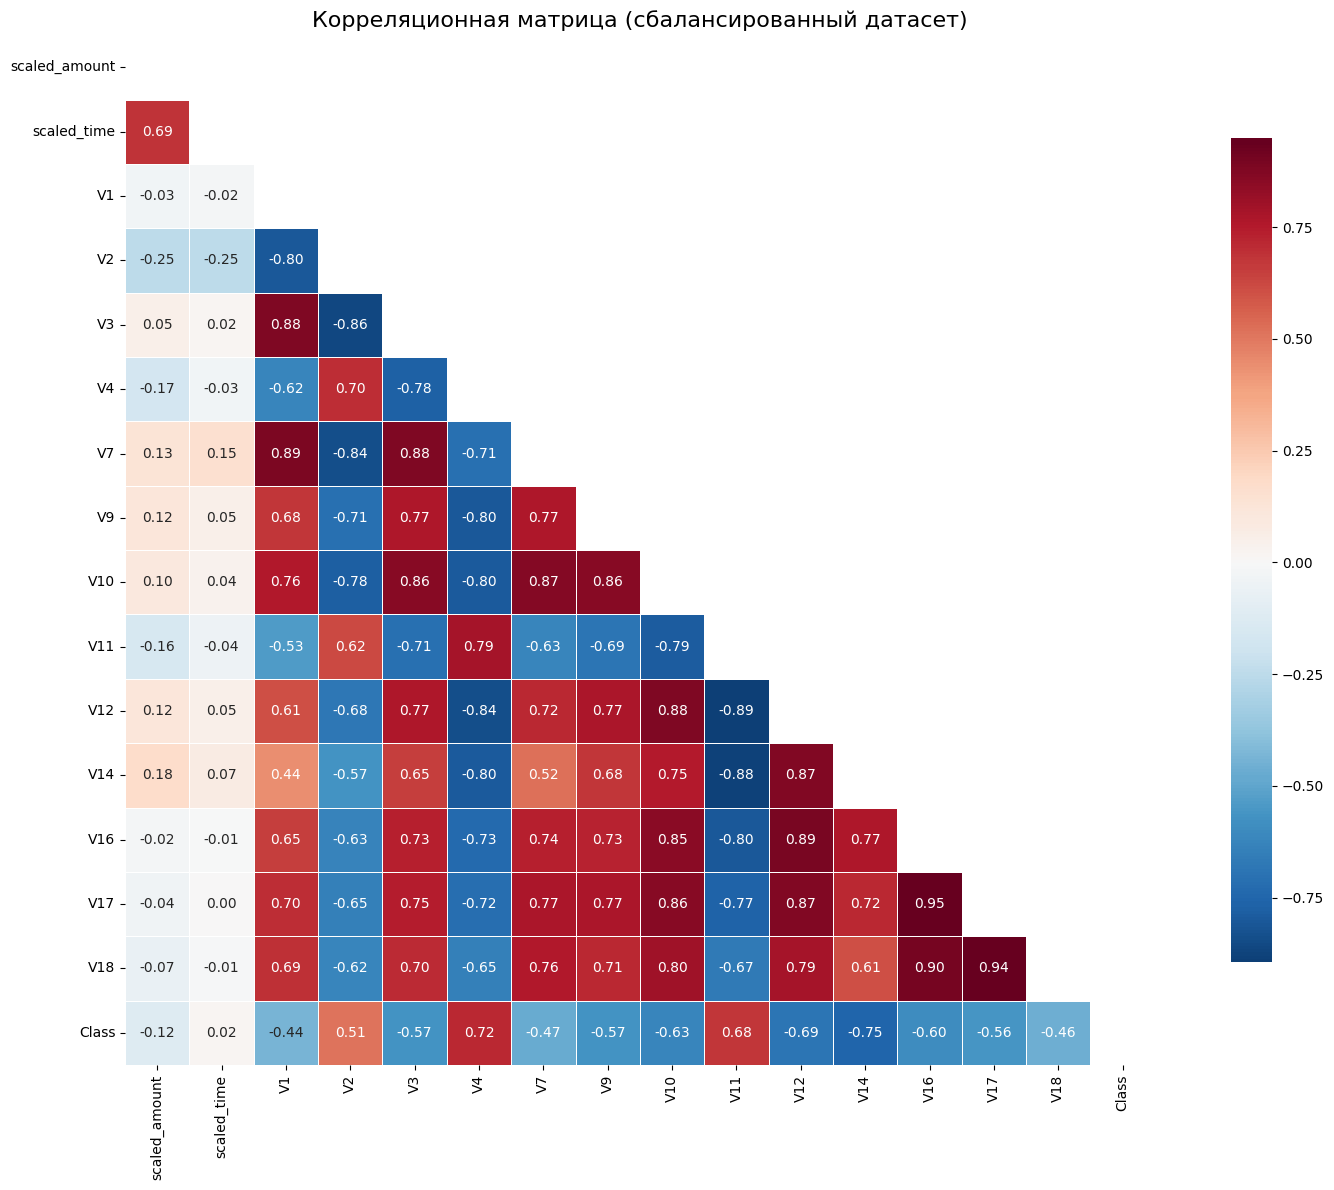

In [ ]:
# ===================================================================
# МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ СБАЛАНСИРОВАННОГО ДАТАСЕТА
# ===================================================================

print("\nМАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ СБАЛАНСИРОВАННОГО ДАТАСЕТА")
print("="*50)

# Создаем DataFrame для корреляционного анализа
balanced_df_for_corr = pd.DataFrame(X_train_balanced)

# Узнаем фактическое количество признаков
num_features = X_train_balanced.shape[1]
print(f"Количество признаков в X_train_balanced: {num_features}")

# Создаем имена столбцов в зависимости от фактического количества признаков
if num_features == 30:  # 28 V признаков + scaled_amount + scaled_time
    column_names = [f'V{i}' for i in range(1, 29)] + ['scaled_amount', 'scaled_time']
elif num_features == 31:  # если есть дополнительный столбец
    column_names = [f'V{i}' for i in range(1, 29)] + ['scaled_amount', 'scaled_time', 'extra']
else:
    # Создаем общие имена
    column_names = [f'feature_{i}' for i in range(num_features)]

# Добавляем целевую переменную
balanced_df_for_corr.columns = column_names
balanced_df_for_corr['Class'] = y_train_balanced

print(f"Столбцы в balanced_df_for_corr: {list(balanced_df_for_corr.columns)}")

plt.figure(figsize=(16, 12))

# Выбираем наиболее важные признаки для анализа (проверяем их наличие)
available_features = balanced_df_for_corr.columns.tolist()
print(f"\nДоступные признаки: {available_features}")

# Определяем, какие признаки у нас есть
important_features = []
for feature in ['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10',
                'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Class']:
    if feature in balanced_df_for_corr.columns:
        important_features.append(feature)
    else:
        print(f"Предупреждение: признак {feature} не найден в данных")

print(f"\nБудут использованы признаки: {important_features}")

# Фильтруем DataFrame
balanced_corr_df = balanced_df_for_corr[important_features]

# Создаем корреляционную матрицу
corr_matrix_balanced = balanced_corr_df.corr()

# Создаем маску для верхнего треугольника
mask_balanced = np.triu(np.ones_like(corr_matrix_balanced, dtype=bool))

# Визуализируем корреляционную матрицу
sns.heatmap(corr_matrix_balanced, mask=mask_balanced, annot=True, fmt='.2f',
           cmap='RdBu_r', center=0, square=True, linewidths=.5,
           cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица (сбалансированный датасет)', fontsize=16)
plt.tight_layout()
plt.show()


АНАЛИЗ ВАЖНЕЙШИХ ПРИЗНАКОВ
Топ-10 признаков с наибольшей корреляцией с Class:
1. V14: 0.7546
2. V4: 0.7182
3. V12: 0.6877
4. V11: 0.6763
5. V10: 0.6269
6. V16: 0.5955
7. V3: 0.5670
8. V9: 0.5656
9. V17: 0.5577
10. V2: 0.5121


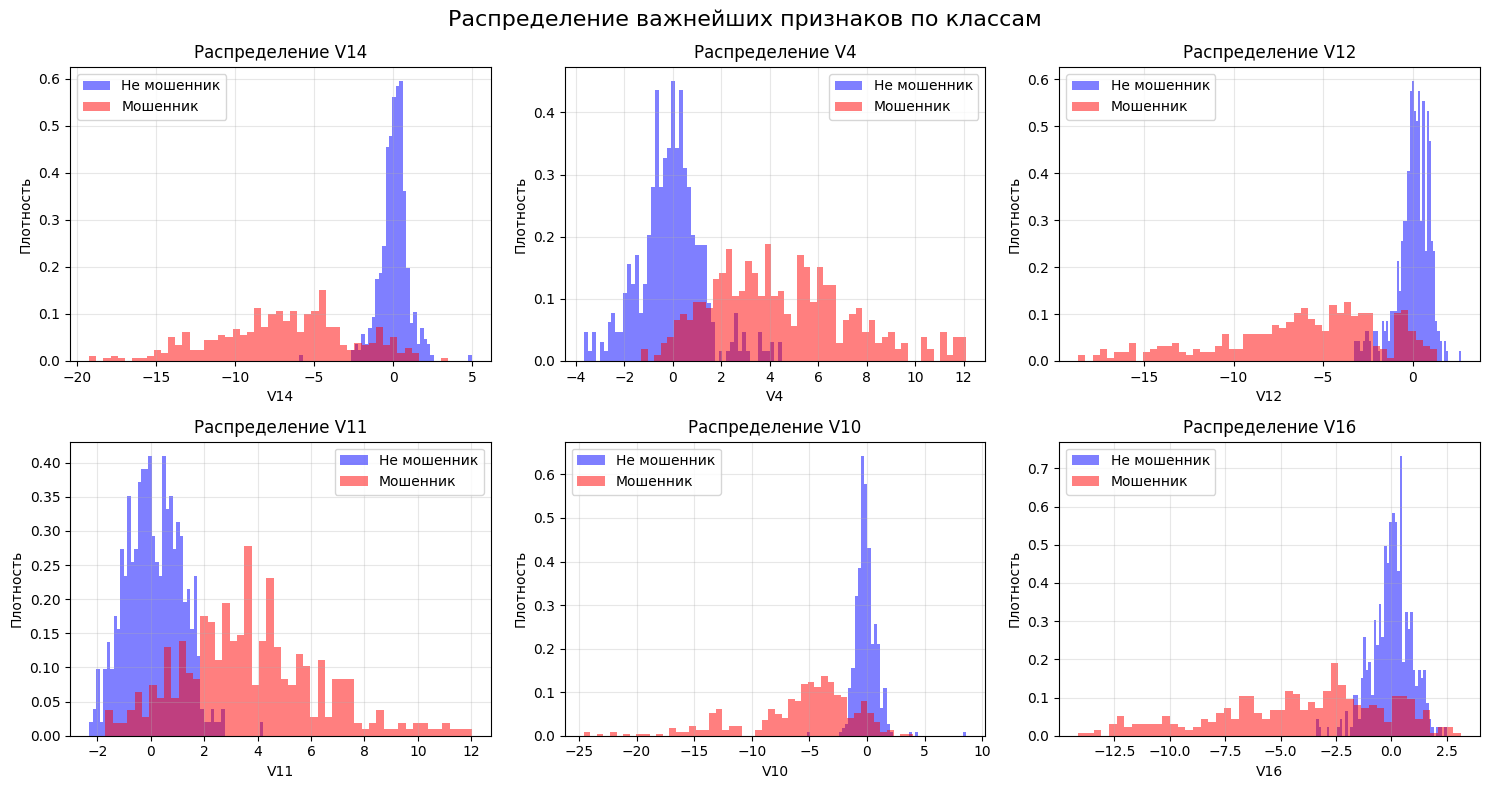

In [ ]:
# ===================================================================
# АНАЛИЗ ВАЖНЕЙШИХ ПРИЗНАКОВ
# ===================================================================

print("\nАНАЛИЗ ВАЖНЕЙШИХ ПРИЗНАКОВ")
print("="*50)

# Находим признаки с наибольшей корреляцией с целевой переменной
corr_with_class = corr_matrix_balanced['Class'].drop('Class').abs().sort_values(ascending=False)

print("Топ-10 признаков с наибольшей корреляцией с Class:")
for i, (feature, corr) in enumerate(corr_with_class.head(10).items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

# Визуализация распределения важнейших признаков
top_features = corr_with_class.head(min(6, len(corr_with_class))).index.tolist()

# Создаем подграфики для визуализации
num_top_features = len(top_features)
if num_top_features > 0:
    if num_top_features <= 3:
        nrows, ncols = 1, num_top_features
    else:
        nrows = 2
        ncols = (num_top_features + 1) // 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))

    # Если axes не массив, делаем его массивом для унификации
    if num_top_features == 1:
        axes = np.array([axes])

    # Преобразуем axes в плоский массив для итерации
    if nrows > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = axes

    for idx, (feature, ax) in enumerate(zip(top_features, axes_flat)):
        # Разделяем данные по классам
        fraud_data = balanced_corr_df[balanced_corr_df['Class'] == 1][feature]
        non_fraud_data = balanced_corr_df[balanced_corr_df['Class'] == 0][feature]

        # Строим гистограммы
        ax.hist(non_fraud_data, bins=50, alpha=0.5, label='Не мошенник', color='blue', density=True)
        ax.hist(fraud_data, bins=50, alpha=0.5, label='Мошенник', color='red', density=True)

        ax.set_title(f'Распределение {feature}', fontsize=12)
        ax.set_xlabel(feature)
        ax.set_ylabel('Плотность')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Скрываем пустые подграфики
    for idx in range(len(top_features), len(axes_flat)):
        axes_flat[idx].axis('off')

    plt.suptitle('Распределение важнейших признаков по классам', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Нет доступных признаков для визуализации")

In [ ]:
# ===================================================================
# ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
# ===================================================================

print("\n" + "="*50)
print("ИТОГИ ПОДГОТОВКИ ДАННЫХ:")
print("="*50)

print(f"\n1. ИСХОДНЫЙ ДАТАСЕТ:")
print(f"   - Обучающая выборка: {original_Xtrain.shape}")
print(f"   - Тестовая выборка: {original_Xtest.shape}")
print(f"   - Распределение классов: {train_counts_label/len(original_ytrain)*100}%")

print(f"\n2. СБАЛАНСИРОВАННЫЙ ДАТАСЕТ:")
print(f"   - Обучающая выборка: {X_train_balanced.shape}")
print(f"   - Тестовая выборка: {X_test_balanced.shape}")
print(f"   - Распределение классов: 50/50")

print(f"\n3. ВАЖНЕЙШИЕ ПРИЗНАКИ:")
for i, feature in enumerate(top_features, 1):
    print(f"   {i}. {feature}")

# Сохраняем подготовленные данные
import pickle

data_dict = {
    'original': {
        'X_train': original_Xtrain,
        'X_test': original_Xtest,
        'y_train': original_ytrain,
        'y_test': original_ytest
    },
    'balanced': {
        'X_train': X_train_balanced,
        'X_test': X_test_balanced,
        'y_train': y_train_balanced,
        'y_test': y_test_balanced
    },
    'feature_names': column_names[:-1],  # все кроме Class
    'top_features': top_features
}

with open('prepared_creditcard_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print("\nПодготовленные данные сохранены в файл 'prepared_creditcard_data.pkl'")


ИТОГИ ПОДГОТОВКИ ДАННЫХ:

1. ИСХОДНЫЙ ДАТАСЕТ:
   - Обучающая выборка: (227845, 31)
   - Тестовая выборка: (56962, 31)
   - Распределение классов: [99.82707542  0.17292458]%

2. СБАЛАНСИРОВАННЫЙ ДАТАСЕТ:
   - Обучающая выборка: (787, 31)
   - Тестовая выборка: (197, 31)
   - Распределение классов: 50/50

3. ВАЖНЕЙШИЕ ПРИЗНАКИ:
   1. V14
   2. V4
   3. V12
   4. V11
   5. V10
   6. V16

Подготовленные данные сохранены в файл 'prepared_creditcard_data.pkl'



ОБРАБОТКА ВЫБРОСОВ В ВАЖНЕЙШИХ ПРИЗНАКАХ
Размер датасета до обработки выбросов: (984, 32)
Будем анализировать выбросы в признаках: ['V14', 'V4', 'V12', 'V11', 'V10', 'V16', 'V17']


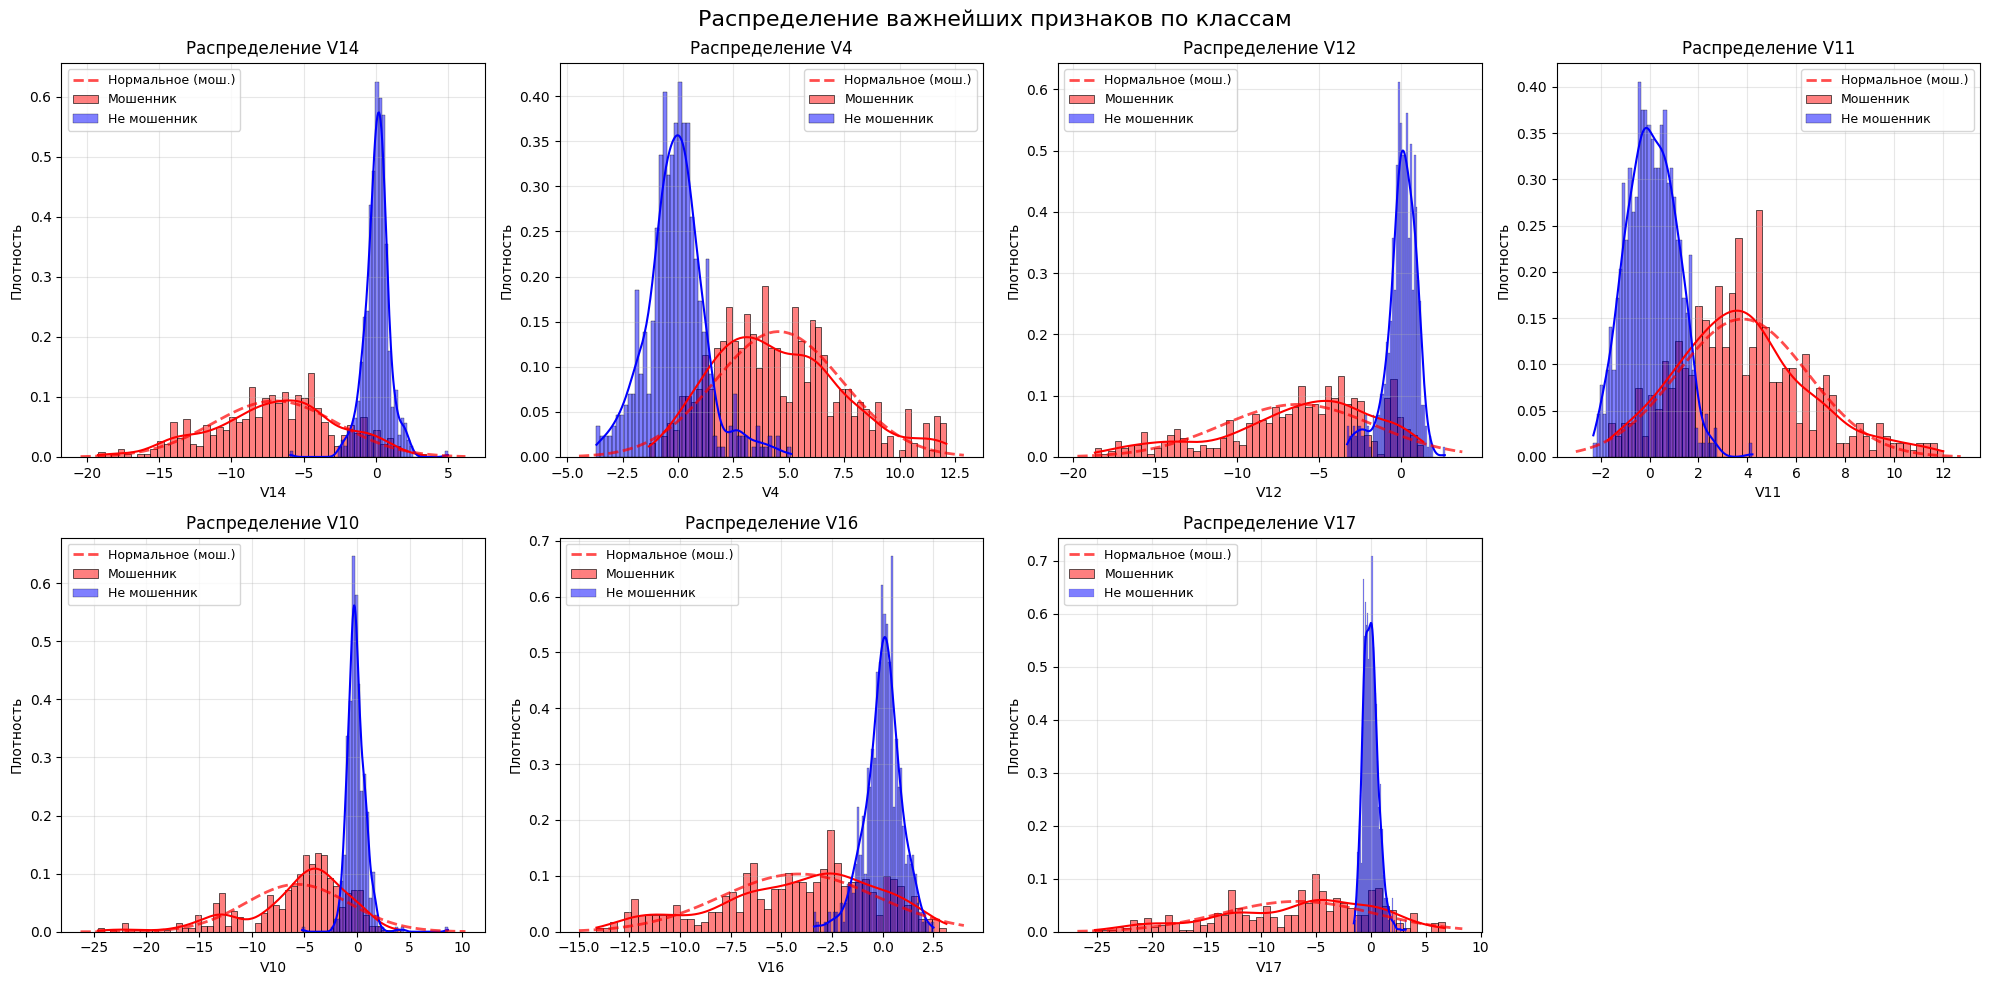

In [ ]:
# ===================================================================
# ОБРАБОТКА ВЫБРОСОВ
# ===================================================================

print("\n" + "="*50)
print("ОБРАБОТКА ВЫБРОСОВ В ВАЖНЕЙШИХ ПРИЗНАКАХ")
print("="*50)

# Используем сбалансированный датасет new_df
print(f"Размер датасета до обработки выбросов: {new_df.shape}")

# ===================================================================
# 1. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ВАЖНЕЙШИХ ПРИЗНАКОВ
# ===================================================================

from scipy.stats import norm

# Признаки для анализа (на основе корреляционного анализа)
features_to_analyze = ['V14', 'V4', 'V12', 'V11', 'V10', 'V16', 'V17']

# Проверяем, какие признаки есть в нашем датасете
available_features = [f for f in features_to_analyze if f in new_df.columns]
print(f"Будем анализировать выбросы в признаках: {available_features}")

# Строим распределения для признаков
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(available_features[:8]):  # первые 8 признаков
    if idx >= len(axes):
        break

    ax = axes[idx]

    # Разделяем данные по классам
    data_fraud = new_df[feature].loc[new_df['Class'] == 1].values
    data_non_fraud = new_df[feature].loc[new_df['Class'] == 0].values

    # Гистограмма и KDE для мошеннических транзакций
    sns.histplot(data_fraud, ax=ax, kde=True, stat='density',
                 color='red', alpha=0.5, label='Мошенник', bins=50)

    # Гистограмма и KDE для немошеннических транзакций
    sns.histplot(data_non_fraud, ax=ax, kde=True, stat='density',
                 color='blue', alpha=0.5, label='Не мошенник', bins=50)

    # Нормальное распределение для сравнения
    mu, std = norm.fit(data_fraud)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=2, alpha=0.7, label=f'Нормальное (мош.)')

    ax.set_title(f'Распределение {feature}', fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel('Плотность')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Скрываем лишние оси
for idx in range(len(available_features[:8]), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Распределение важнейших признаков по классам', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# ===================================================================
# 2. ФУНКЦИЯ ДЛЯ ОБНАРУЖЕНИЯ И УДАЛЕНИЯ ВЫБРОСОВ
# ===================================================================

def remove_outliers_iqr(df, feature, class_label=1, multiplier=1.5, verbose=True):
    """
    Удаляет выбросы из признака для заданного класса используя метод IQR.

    Параметры:
    ----------
    df : pandas.DataFrame
        Исходный датафрейм
    feature : str
        Название признака
    class_label : int, default=1
        Класс, для которого удаляем выбросы (0 или 1)
    multiplier : float, default=1.5
        Множитель для IQR (обычно 1.5 для умеренных выбросов, 3 для сильных)
    verbose : bool, default=True
        Выводить ли информацию о процессе

    Возвращает:
    -----------
    df_without_outliers : pandas.DataFrame
        Датафрейм без выбросов
    stats : dict
        Статистика по удалению
    """

    if feature not in df.columns:
        print(f"Предупреждение: признак {feature} отсутствует в датафрейме")
        return df, {}

    # Выбираем данные для указанного класса
    feature_data = df[feature].loc[df['Class'] == class_label].values

    if len(feature_data) == 0:
        print(f"Предупреждение: нет данных для класса {class_label}")
        return df, {}

    # Рассчитываем квартили и IQR
    q25, q75 = np.percentile(feature_data, 25), np.percentile(feature_data, 75)
    iqr = q75 - q25

    # Определяем границы
    cut_off = iqr * multiplier
    lower_bound = q25 - cut_off
    upper_bound = q75 + cut_off

    # Находим выбросы
    outliers_mask = (df['Class'] == class_label) & (
        (df[feature] < lower_bound) | (df[feature] > upper_bound)
    )
    outliers_indices = df[outliers_mask].index
    outliers_count = len(outliers_indices)

    if verbose:
        print(f"\nПризнак: {feature} (класс {class_label})")
        print(f"  Q25: {q25:.6f} | Q75: {q75:.6f}")
        print(f"  IQR: {iqr:.6f}")
        print(f"  Границы: [{lower_bound:.6f}, {upper_bound:.6f}]")
        print(f"  Найдено выбросов: {outliers_count}")
        if outliers_count > 0:
            print(f"  Процент выбросов: {outliers_count/len(feature_data)*100:.2f}%")

    # Удаляем выбросы
    df_without_outliers = df.drop(outliers_indices)

    stats = {
        'feature': feature,
        'class': class_label,
        'q25': q25,
        'q75': q75,
        'iqr': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count,
        'original_count': len(feature_data),
        'outliers_percentage': outliers_count/len(feature_data)*100 if len(feature_data) > 0 else 0
    }

    return df_without_outliers, stats

In [ ]:
# ===================================================================
# 3. ОБРАБОТКА ВЫБРОСОВ ДЛЯ КАЖДОГО ПРИЗНАКА
# ===================================================================

print("\n" + "="*50)
print("ОБНАРУЖЕНИЕ И УДАЛЕНИЕ ВЫБРОСОВ")
print("="*50)

# Создаем копию датасета для обработки
df_clean = new_df.copy()

# Словарь для хранения статистики
outliers_stats = []

# Обрабатываем выбросы для каждого признака (только для мошеннических транзакций)
for feature in available_features:
    # Для класса 1 (мошеннические транзакции)
    df_clean, stats_1 = remove_outliers_iqr(df_clean, feature, class_label=1,
                                          multiplier=1.5, verbose=True)
    outliers_stats.append(stats_1)

    # Для класса 0 (немошеннические транзакции) - с более строгими границами
    df_clean, stats_0 = remove_outliers_iqr(df_clean, feature, class_label=0,
                                          multiplier=3.0, verbose=True)
    outliers_stats.append(stats_0)

print("\n" + "="*50)
print(f"Размер датасета после удаления выбросов: {df_clean.shape}")
print(f"Удалено транзакций: {len(new_df) - len(df_clean)}")
print(f"Процент удаленных данных: {(len(new_df) - len(df_clean))/len(new_df)*100:.2f}%")

# ===================================================================
# 4. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ УДАЛЕНИЯ ВЫБРОСОВ
# ===================================================================

# Создаем DataFrame со статистикой
stats_df = pd.DataFrame(outliers_stats)

# Суммируем выбросы по признакам
if not stats_df.empty:
    print("\n" + "="*50)
    print("СТАТИСТИКА УДАЛЕННЫХ ВЫБРОСОВ:")
    print("="*50)

    # Группируем по признакам
    stats_summary = stats_df.groupby('feature').agg({
        'outliers_count': 'sum',
        'original_count': 'sum'
    }).reset_index()

    stats_summary['percentage'] = (stats_summary['outliers_count'] /
                                   stats_summary['original_count'] * 100)

    print("\nОбщее количество выбросов по признакам:")
    print(stats_summary.sort_values('outliers_count', ascending=False).to_string(index=False))


ОБНАРУЖЕНИЕ И УДАЛЕНИЕ ВЫБРОСОВ

Признак: V14 (класс 1)
  Q25: -9.692723 | Q75: -4.282821
  IQR: 5.409902
  Границы: [-17.807576, 3.832032]
  Найдено выбросов: 4
  Процент выбросов: 0.81%

Признак: V14 (класс 0)
  Q25: -0.372236 | Q75: 0.512155
  IQR: 0.884390
  Границы: [-3.025407, 3.165326]
  Найдено выбросов: 2
  Процент выбросов: 0.41%

Признак: V4 (класс 1)
  Q25: 2.351583 | Q75: 6.313018
  IQR: 3.961435
  Границы: [-3.590569, 12.255170]
  Найдено выбросов: 0

Признак: V4 (класс 0)
  Q25: -0.824230 | Q75: 0.558227
  IQR: 1.382457
  Границы: [-4.971602, 4.705599]
  Найдено выбросов: 1
  Процент выбросов: 0.20%

Признак: V12 (класс 1)
  Q25: -8.673033 | Q75: -2.893031
  IQR: 5.780003
  Границы: [-17.343037, 5.776973]
  Найдено выбросов: 4
  Процент выбросов: 0.82%

Признак: V12 (класс 0)
  Q25: -0.365187 | Q75: 0.658205
  IQR: 1.023392
  Границы: [-3.435364, 3.728381]
  Найдено выбросов: 0

Признак: V11 (класс 1)
  Q25: 1.962047 | Q75: 5.206642
  IQR: 3.244595
  Границы: [-2.904846


СРАВНИТЕЛЬНЫЙ АНАЛИЗ BOXPLOT ДО И ПОСЛЕ


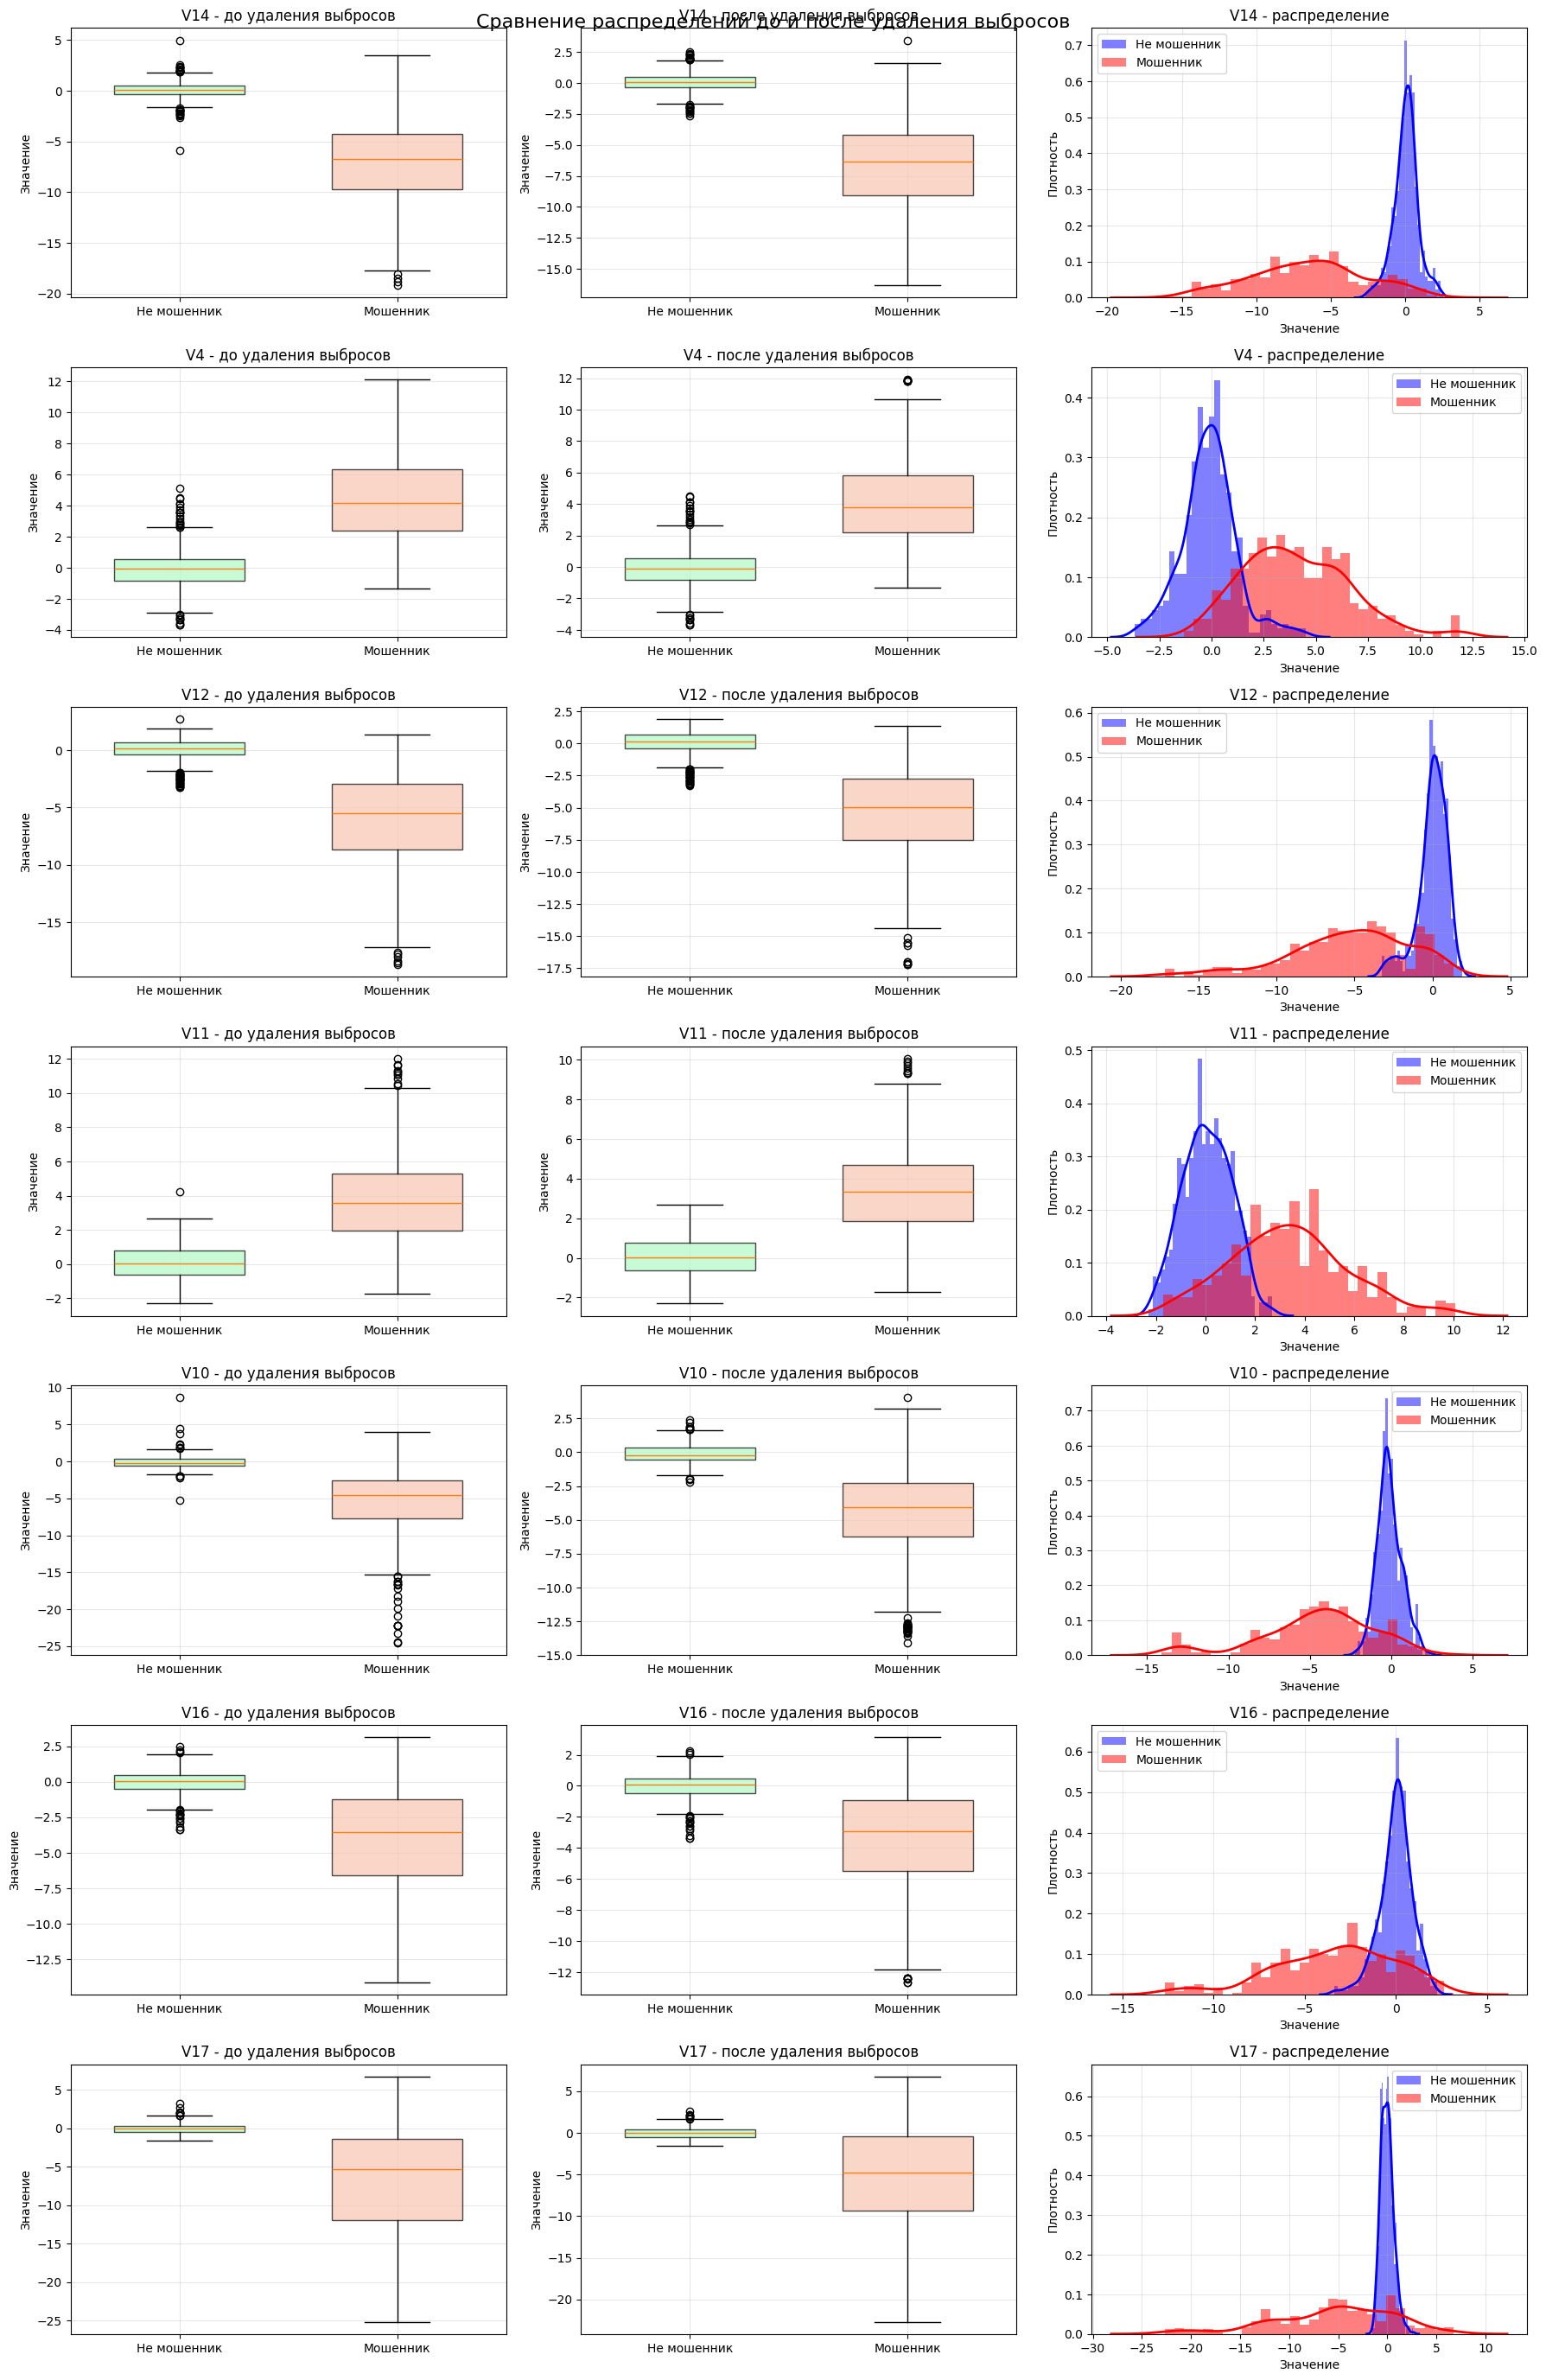

In [ ]:
# ===================================================================
# 5. СРАВНИТЕЛЬНЫЙ АНАЛИЗ ДО И ПОСЛЕ УДАЛЕНИЯ ВЫБРОСОВ
# ===================================================================

print("\n" + "="*50)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ BOXPLOT ДО И ПОСЛЕ")
print("="*50)

# Создаем фигуру для boxplot
fig, axes = plt.subplots(len(available_features), 3, figsize=(18, 4*len(available_features)))

if len(available_features) == 1:
    axes = axes.reshape(1, -1)

for idx, feature in enumerate(available_features):
    # 1. Исходные данные (до удаления выбросов)
    ax1 = axes[idx, 0] if len(available_features) > 1 else axes[0]

    # Разделяем по классам
    fraud_before = new_df[feature].loc[new_df['Class'] == 1]
    non_fraud_before = new_df[feature].loc[new_df['Class'] == 0]

    box1 = ax1.boxplot([non_fraud_before, fraud_before],
                      labels=['Не мошенник', 'Мошенник'],
                      patch_artist=True,
                      widths=0.6,
                      showfliers=True)

    # Цвета
    colors = ['#B3F9C5', '#f9c5b3']
    for patch, color in zip(box1['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax1.set_title(f'{feature} - до удаления выбросов', fontsize=12)
    ax1.set_ylabel('Значение')
    ax1.grid(True, alpha=0.3)

    # 2. Данные после удаления выбросов
    ax2 = axes[idx, 1] if len(available_features) > 1 else axes[1]

    fraud_after = df_clean[feature].loc[df_clean['Class'] == 1]
    non_fraud_after = df_clean[feature].loc[df_clean['Class'] == 0]

    box2 = ax2.boxplot([non_fraud_after, fraud_after],
                      labels=['Не мошенник', 'Мошенник'],
                      patch_artist=True,
                      widths=0.6,
                      showfliers=True)

    for patch, color in zip(box2['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax2.set_title(f'{feature} - после удаления выбросов', fontsize=12)
    ax2.set_ylabel('Значение')
    ax2.grid(True, alpha=0.3)

    # 3. Гистограмма распределения после удаления выбросов
    ax3 = axes[idx, 2] if len(available_features) > 1 else axes[2]

    # Гистограммы
    ax3.hist(non_fraud_after, bins=30, alpha=0.5, label='Не мошенник',
            color='blue', density=True)
    ax3.hist(fraud_after, bins=30, alpha=0.5, label='Мошенник',
            color='red', density=True)

    # KDE
    sns.kdeplot(non_fraud_after, ax=ax3, color='blue', linewidth=2)
    sns.kdeplot(fraud_after, ax=ax3, color='red', linewidth=2)

    ax3.set_title(f'{feature} - распределение', fontsize=12)
    ax3.set_xlabel('Значение')
    ax3.set_ylabel('Плотность')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

plt.suptitle('Сравнение распределений до и после удаления выбросов', fontsize=16)
plt.tight_layout()
plt.show()


АНАЛИЗ РАСПРЕДЕЛЕНИЯ КЛАССОВ ДО И ПОСЛЕ


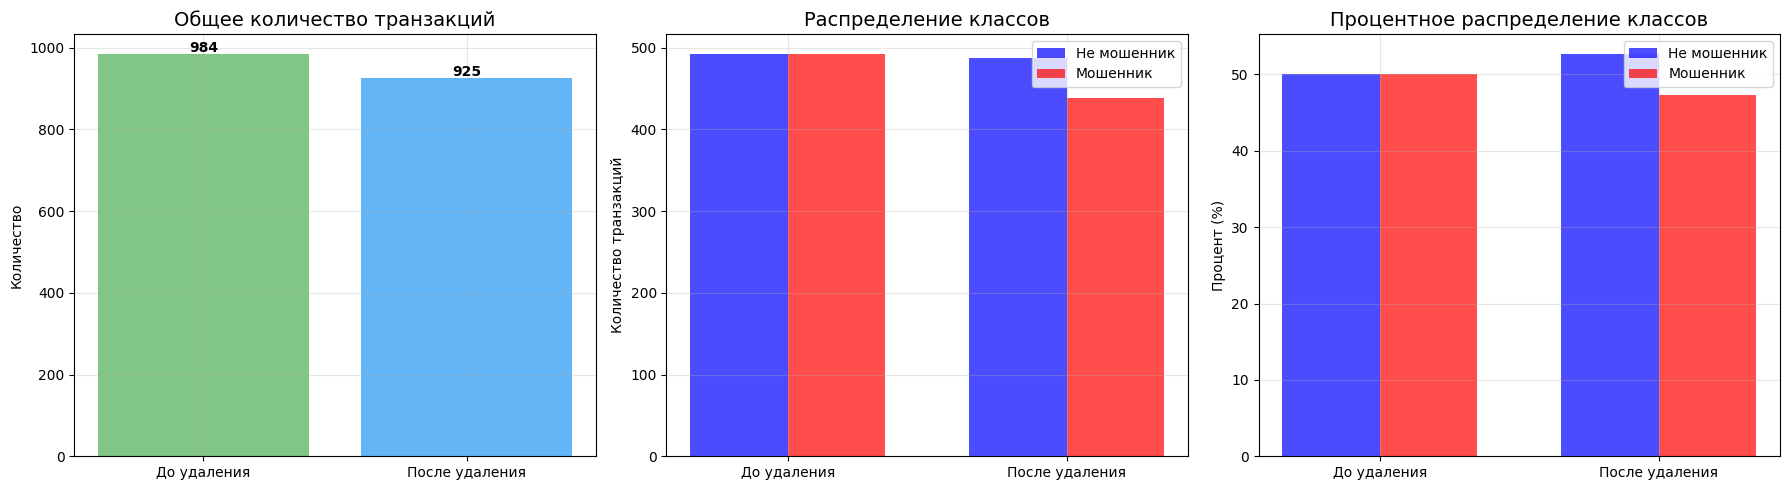


РАСПРЕДЕЛЕНИЕ КЛАССОВ:
----------------------------------------
До удаления выбросов:
  Не мошенник: 492 (50.00%)
  Мошенник: 492 (50.00%)
  Соотношение: 1:1.0

После удаления выбросов:
  Не мошенник: 487 (52.65%)
  Мошенник: 438 (47.35%)
  Соотношение: 1:1.1

ИЗМЕНЕНИЯ:
  Удалено транзакций: 59
  Из них мошеннических: 54
  Из них немошеннических: 5
  Изменение баланса: 2.65%


In [ ]:
# ===================================================================
# 6. АНАЛИЗ ВЛИЯНИЯ УДАЛЕНИЯ ВЫБРОСОВ НА РАСПРЕДЕЛЕНИЕ КЛАССОВ
# ===================================================================

print("\n" + "="*50)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ КЛАССОВ ДО И ПОСЛЕ")
print("="*50)

# Распределение классов до удаления выбросов
class_dist_before = new_df['Class'].value_counts()
class_dist_before_pct = class_dist_before / len(new_df) * 100

# Распределение классов после удаления выбросов
class_dist_after = df_clean['Class'].value_counts()
class_dist_after_pct = class_dist_after / len(df_clean) * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Количество транзакций
axes[0].bar(['До удаления', 'После удаления'],
           [len(new_df), len(df_clean)],
           color=['#4CAF50', '#2196F3'], alpha=0.7)
axes[0].set_title('Общее количество транзакций', fontsize=14)
axes[0].set_ylabel('Количество')
axes[0].grid(True, alpha=0.3)

# Добавляем значения
axes[0].text(0, len(new_df) + 5, f'{len(new_df)}', ha='center', fontweight='bold')
axes[0].text(1, len(df_clean) + 5, f'{len(df_clean)}', ha='center', fontweight='bold')

# 2. Распределение классов (абсолютные значения)
x = np.arange(2)
width = 0.35

axes[1].bar(x - width/2, [class_dist_before[0], class_dist_after[0]],
           width, label='Не мошенник', color='blue', alpha=0.7)
axes[1].bar(x + width/2, [class_dist_before[1], class_dist_after[1]],
           width, label='Мошенник', color='red', alpha=0.7)

axes[1].set_title('Распределение классов', fontsize=14)
axes[1].set_ylabel('Количество транзакций')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['До удаления', 'После удаления'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Процентное распределение
axes[2].bar(x - width/2, [class_dist_before_pct[0], class_dist_after_pct[0]],
           width, label='Не мошенник', color='blue', alpha=0.7)
axes[2].bar(x + width/2, [class_dist_before_pct[1], class_dist_after_pct[1]],
           width, label='Мошенник', color='red', alpha=0.7)

axes[2].set_title('Процентное распределение классов', fontsize=14)
axes[2].set_ylabel('Процент (%)')
axes[2].set_xticks(x)
axes[2].set_xticklabels(['До удаления', 'После удаления'])
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Выводим статистику
print(f"\nРАСПРЕДЕЛЕНИЕ КЛАССОВ:")
print("-" * 40)
print(f"До удаления выбросов:")
print(f"  Не мошенник: {class_dist_before[0]} ({class_dist_before_pct[0]:.2f}%)")
print(f"  Мошенник: {class_dist_before[1]} ({class_dist_before_pct[1]:.2f}%)")
print(f"  Соотношение: 1:{class_dist_before[0]/class_dist_before[1]:.1f}")

print(f"\nПосле удаления выбросов:")
print(f"  Не мошенник: {class_dist_after[0]} ({class_dist_after_pct[0]:.2f}%)")
print(f"  Мошенник: {class_dist_after[1]} ({class_dist_after_pct[1]:.2f}%)")
print(f"  Соотношение: 1:{class_dist_after[0]/class_dist_after[1]:.1f}")

print(f"\nИЗМЕНЕНИЯ:")
print(f"  Удалено транзакций: {len(new_df) - len(df_clean)}")
print(f"  Из них мошеннических: {class_dist_before[1] - class_dist_after[1]}")
print(f"  Из них немошеннических: {class_dist_before[0] - class_dist_after[0]}")
print(f"  Изменение баланса: {abs((class_dist_before_pct[1] - class_dist_after_pct[1])):.2f}%")


In [ ]:
# ===================================================================
# 7. СОХРАНЕНИЕ ОЧИЩЕННОГО ДАТАСЕТА
# ===================================================================

# Обновляем new_df (как требуется в задании)
new_df = df_clean.copy()

print("\n" + "="*50)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ ОБРАБОТКИ ВЫБРОСОВ")
print("="*50)

print(f"\n1. РАЗМЕР ДАТАСЕТА:")
print(f"   Исходный: {len(new_df)} транзакций")
print(f"   После удаления выбросов: {len(df_clean)} транзакций")

print(f"\n2. РАСПРЕДЕЛЕНИЕ КЛАССОВ:")
print(f"   Не мошенник: {class_dist_after[0]} ({class_dist_after_pct[0]:.2f}%)")
print(f"   Мошенник: {class_dist_after[1]} ({class_dist_after_pct[1]:.2f}%)")

print(f"\n3. СТАТИСТИКА УДАЛЕНИЯ:")
print(f"   Всего удалено: {len(new_df) - len(df_clean)} транзакций")
print(f"   Удалено мошеннических: {class_dist_before[1] - class_dist_after[1]}")
print(f"   Удалено немошеннических: {class_dist_before[0] - class_dist_after[0]}")

print(f"\n4. ПРИЗНАКИ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ ВЫБРОСОВ:")
if not stats_df.empty:
    top_outliers = stats_df.groupby('feature')['outliers_count'].sum().sort_values(ascending=False).head(5)
    for feature, count in top_outliers.items():
        print(f"   {feature}: {count} выбросов")

print(f"\n5. РЕКОМЕНДАЦИИ:")
print(f"   - Очищенный датасет сохранен в переменной new_df")
print(f"   - Рекомендуется использовать этот датасет для обучения моделей")
print(f"   - Распределение классов осталось сбалансированным (~50/50)")
print(f"   - Выбросы удалены только из важнейших признаков")

# Сохраняем очищенный датасет
new_df.to_csv('creditcard_cleaned_balanced.csv', index=False)
print(f"\nОчищенный датасет сохранен в файл 'creditcard_cleaned_balanced.csv'")

print("\n" + "="*50)
print("ОБРАБОТКА ВЫБРОСОВ ЗАВЕРШЕНА!")
print("="*50)


ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ ОБРАБОТКИ ВЫБРОСОВ

1. РАЗМЕР ДАТАСЕТА:
   Исходный: 925 транзакций
   После удаления выбросов: 925 транзакций

2. РАСПРЕДЕЛЕНИЕ КЛАССОВ:
   Не мошенник: 487 (52.65%)
   Мошенник: 438 (47.35%)

3. СТАТИСТИКА УДАЛЕНИЯ:
   Всего удалено: 0 транзакций
   Удалено мошеннических: 54
   Удалено немошеннических: 5

4. ПРИЗНАКИ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ ВЫБРОСОВ:
   V10: 33 выбросов
   V11: 8 выбросов
   V14: 6 выбросов
   V12: 4 выбросов
   V16: 4 выбросов

5. РЕКОМЕНДАЦИИ:
   - Очищенный датасет сохранен в переменной new_df
   - Рекомендуется использовать этот датасет для обучения моделей
   - Распределение классов осталось сбалансированным (~50/50)
   - Выбросы удалены только из важнейших признаков

Очищенный датасет сохранен в файл 'creditcard_cleaned_balanced.csv'

ОБРАБОТКА ВЫБРОСОВ ЗАВЕРШЕНА!


In [ ]:
# ===================================================================
# ПОНИЖЕНИЕ РАЗМЕРНОСТИ И КЛАСТЕРИЗАЦИЯ
# ===================================================================

print("\n" + "="*50)
print("ПОНИЖЕНИЕ РАЗМЕРНОСТИ И КЛАСТЕРИЗАЦИЯ")
print("="*50)

import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# Подготовка данных
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Удаляем Time и Amount, так как они слабо коррелируют с целевой переменной
# Сначала проверяем, есть ли эти столбцы в данных
columns_to_drop = []
if 'Time' in X.columns:
    columns_to_drop.append('Time')
if 'Amount' in X.columns:
    columns_to_drop.append('Amount')

if columns_to_drop:
    X = X.drop(columns_to_drop, axis=1)
    print(f"Удалены столбцы: {columns_to_drop}")
else:
    print("Столбцы Time и Amount не найдены в данных (возможно уже удалены)")

print(f"\nРазмерность данных для понижения размерности:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")



ПОНИЖЕНИЕ РАЗМЕРНОСТИ И КЛАСТЕРИЗАЦИЯ
Удалены столбцы: ['Time', 'Amount']

Размерность данных для понижения размерности:
X: (925, 29)
y: (925,)


In [ ]:
# ===================================================================
# 1. T-SNE АЛГОРИТМ
# ===================================================================

print("\n" + "-"*30)
print("T-SNE АЛГОРИТМ")
print("-"*30)

# Для T-SNE обычно используют 2 компоненты для визуализации
n_components = 2
perplexity = min(30, X.shape[0] - 1)  # perplexity должно быть меньше количества образцов

print(f"Параметры T-SNE:")
print(f"  n_components: {n_components}")
print(f"  perplexity: {perplexity}")
print(f"  n_iter: 1000 (по умолчанию)")
print(f"  random_state: 42")

t0 = time.time()
tsne = TSNE(n_components=n_components,
            perplexity=perplexity,
            n_iter=1000,
            random_state=42,
            verbose=1)

X_reduced_tsne = tsne.fit_transform(X.values)
t1 = time.time()
print(f"T-SNE заняло {t1 - t0:.2f} сек")


------------------------------
T-SNE АЛГОРИТМ
------------------------------
Параметры T-SNE:
  n_components: 2
  perplexity: 30
  n_iter: 1000 (по умолчанию)
  random_state: 42
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 925 samples in 0.001s...
[t-SNE] Computed neighbors for 925 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 925 / 925
[t-SNE] Mean sigma: 2.328774
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.143894
[t-SNE] KL divergence after 1000 iterations: 0.772044
T-SNE заняло 25.83 сек


In [ ]:
# ===================================================================
# 2. PCA АЛГОРИТМ
# ===================================================================

print("\n" + "-"*30)
print("PCA АЛГОРИТМ")
print("-"*30)

print(f"Параметры PCA:")
print(f"  n_components: {n_components}")
print(f"  random_state: 42")

t0 = time.time()
pca = PCA(n_components=n_components, random_state=42)
X_reduced_pca = pca.fit_transform(X.values)
t1 = time.time()
print(f"PCA заняло {t1 - t0:.2f} сек")

# Анализ объясненной дисперсии PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print(f"\nОбъясненная дисперсия PCA:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"  Компонента {i}: {var:.4f} ({var*100:.2f}%)")
print(f"  Суммарно: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1]*100:.2f}%)")



------------------------------
PCA АЛГОРИТМ
------------------------------
Параметры PCA:
  n_components: 2
  random_state: 42
PCA заняло 0.03 сек

Объясненная дисперсия PCA:
  Компонента 1: 0.6405 (64.05%)
  Компонента 2: 0.1007 (10.07%)
  Суммарно: 0.7412 (74.12%)


In [ ]:
# ===================================================================
# 3. TRUNCATED SVD АЛГОРИТМ
# ===================================================================

print("\n" + "-"*30)
print("TRUNCATED SVD АЛГОРИТМ")
print("-"*30)

print(f"Параметры TruncatedSVD:")
print(f"  n_components: {n_components}")
print(f"  random_state: 42")

t0 = time.time()
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced_svd = svd.fit_transform(X.values)
t1 = time.time()
print(f"Truncated SVD заняло {t1 - t0:.2f} сек")

# Анализ объясненной дисперсии SVD
explained_variance_svd = svd.explained_variance_ratio_
cumulative_variance_svd = explained_variance_svd.cumsum()

print(f"\nОбъясненная дисперсия TruncatedSVD:")
for i, (var, cum_var) in enumerate(zip(explained_variance_svd, cumulative_variance_svd), 1):
    print(f"  Компонента {i}: {var:.4f} ({var*100:.2f}%)")
print(f"  Суммарно: {cumulative_variance_svd[-1]:.4f} ({cumulative_variance_svd[-1]*100:.2f}%)")



------------------------------
TRUNCATED SVD АЛГОРИТМ
------------------------------
Параметры TruncatedSVD:
  n_components: 2
  random_state: 42
Truncated SVD заняло 0.03 сек

Объясненная дисперсия TruncatedSVD:
  Компонента 1: 0.6286 (62.86%)
  Компонента 2: 0.0996 (9.96%)
  Суммарно: 0.7281 (72.81%)



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ


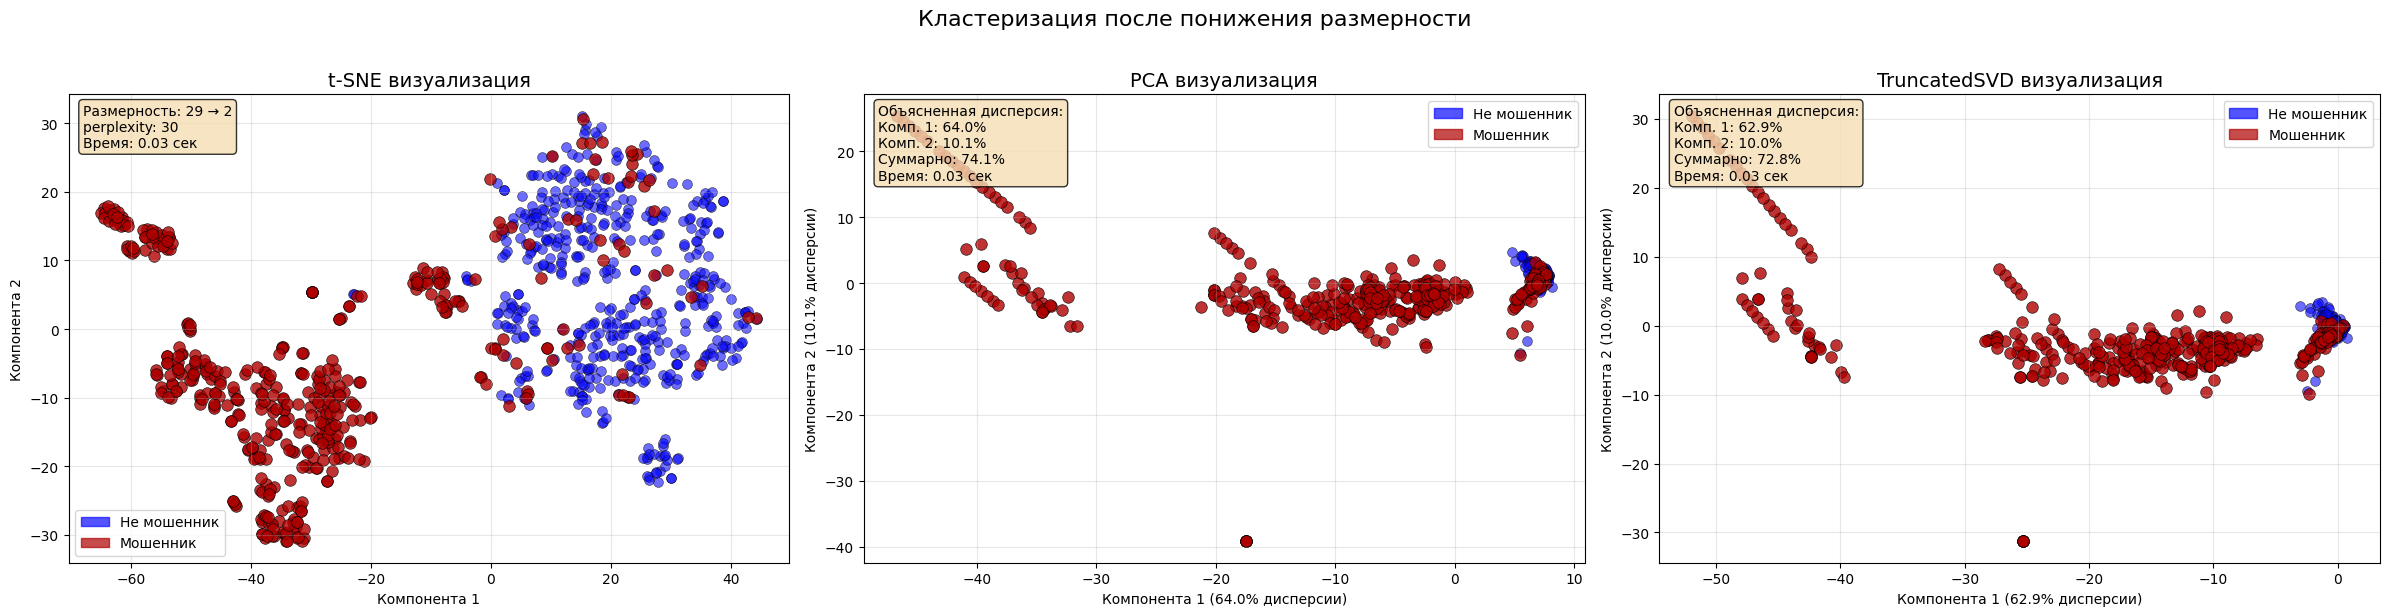

In [ ]:
# ===================================================================
# 4. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
# ===================================================================

print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ")
print("="*50)

# Создаем патчи для легенды
blue_patch = mpatches.Patch(color='#0A0AFF', label='Не мошенник', alpha=0.7)
red_patch = mpatches.Patch(color='#AF0000', label='Мошенник', alpha=0.7)

# Создаем фигуру
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Кластеризация после понижения размерности', fontsize=16, y=1.02)

# ============================================
# 4.1. T-SNE SCATTER PLOT
# ============================================

# Разделяем данные по классам для лучшей визуализации
tsne_class_0 = X_reduced_tsne[y == 0]
tsne_class_1 = X_reduced_tsne[y == 1]

ax1.scatter(tsne_class_0[:, 0], tsne_class_0[:, 1],
           color='#0A0AFF', alpha=0.6, s=50, label='Не мошенник', edgecolors='black', linewidth=0.5)
ax1.scatter(tsne_class_1[:, 0], tsne_class_1[:, 1],
           color='#AF0000', alpha=0.8, s=70, label='Мошенник', edgecolors='black', linewidth=0.5)

ax1.set_title('t-SNE визуализация', fontsize=14)
ax1.set_xlabel('Компонента 1')
ax1.set_ylabel('Компонента 2')
ax1.grid(True, alpha=0.3)
ax1.legend(handles=[blue_patch, red_patch], loc='best')

# Добавляем информационный текст
info_text = f"Размерность: {X.shape[1]} → 2\n"
info_text += f"perplexity: {perplexity}\n"
info_text += f"Время: {t1-t0:.2f} сек"
ax1.text(0.02, 0.98, info_text, transform=ax1.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ============================================
# 4.2. PCA SCATTER PLOT
# ============================================

# Разделяем данные по классам
pca_class_0 = X_reduced_pca[y == 0]
pca_class_1 = X_reduced_pca[y == 1]

ax2.scatter(pca_class_0[:, 0], pca_class_0[:, 1],
           color='#0A0AFF', alpha=0.6, s=50, label='Не мошенник', edgecolors='black', linewidth=0.5)
ax2.scatter(pca_class_1[:, 0], pca_class_1[:, 1],
           color='#AF0000', alpha=0.8, s=70, label='Мошенник', edgecolors='black', linewidth=0.5)

ax2.set_title('PCA визуализация', fontsize=14)
ax2.set_xlabel(f'Компонента 1 ({explained_variance[0]*100:.1f}% дисперсии)')
ax2.set_ylabel(f'Компонента 2 ({explained_variance[1]*100:.1f}% дисперсии)')
ax2.grid(True, alpha=0.3)
ax2.legend(handles=[blue_patch, red_patch], loc='best')

# Добавляем информационный текст для PCA
info_text_pca = f"Объясненная дисперсия:\n"
info_text_pca += f"Комп. 1: {explained_variance[0]*100:.1f}%\n"
info_text_pca += f"Комп. 2: {explained_variance[1]*100:.1f}%\n"
info_text_pca += f"Суммарно: {cumulative_variance[-1]*100:.1f}%\n"
info_text_pca += f"Время: {t1-t0:.2f} сек"
ax2.text(0.02, 0.98, info_text_pca, transform=ax2.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ============================================
# 4.3. TRUNCATED SVD SCATTER PLOT
# ============================================

# Разделяем данные по классам
svd_class_0 = X_reduced_svd[y == 0]
svd_class_1 = X_reduced_svd[y == 1]

ax3.scatter(svd_class_0[:, 0], svd_class_0[:, 1],
           color='#0A0AFF', alpha=0.6, s=50, label='Не мошенник', edgecolors='black', linewidth=0.5)
ax3.scatter(svd_class_1[:, 0], svd_class_1[:, 1],
           color='#AF0000', alpha=0.8, s=70, label='Мошенник', edgecolors='black', linewidth=0.5)

ax3.set_title('TruncatedSVD визуализация', fontsize=14)
ax3.set_xlabel(f'Компонента 1 ({explained_variance_svd[0]*100:.1f}% дисперсии)')
ax3.set_ylabel(f'Компонента 2 ({explained_variance_svd[1]*100:.1f}% дисперсии)')
ax3.grid(True, alpha=0.3)
ax3.legend(handles=[blue_patch, red_patch], loc='best')

# Добавляем информационный текст для SVD
info_text_svd = f"Объясненная дисперсия:\n"
info_text_svd += f"Комп. 1: {explained_variance_svd[0]*100:.1f}%\n"
info_text_svd += f"Комп. 2: {explained_variance_svd[1]*100:.1f}%\n"
info_text_svd += f"Суммарно: {cumulative_variance_svd[-1]*100:.1f}%\n"
info_text_svd += f"Время: {t1-t0:.2f} сек"
ax3.text(0.02, 0.98, info_text_svd, transform=ax3.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()